# Build App for face detection from camera

### Bài Viết Hướng Dẫn Xây Dựng Code Face Detection and Smoothing Skin và Cắt Khuôn Mặt từ Camera

**Mục Tiêu:** 
Hướng dẫn thực hành giúp sinh viên hiểu và xây dựng ứng dụng nhận diện khuôn mặt và làm sáng da, mịn màng qua camera thời gian thực. 

**Công Cụ Cần Chuẩn Bị:**
1. **Python**: Ngôn ngữ lập trình sử dụng để xây dựng ứng dụng.
2. **Thư Viện**:
   - `opencv-python`: Dùng để xử lý hình ảnh và nhận diện khuôn mặt.
   - `mediapipe`: Thư viện hỗ trợ nhận diện khuôn mặt và các bộ phận cơ thể.
   - `Pillow (PIL)`: Dùng để xử lý và chỉnh sửa hình ảnh (như làm sáng da).
3. **Camera**: Để thu hình ảnh và nhận diện khuôn mặt trực tiếp.

### Các Bước Xây Dựng Code

**1. Cài đặt các thư viện cần thiết**

Trước hết, sinh viên cần cài đặt các thư viện sau qua pip:

```bash
pip install opencv-python mediapipe pillow
```

**2. Sử Dụng Mediapipe để Nhận Diện Khuôn Mặt**

- Mediapipe là một thư viện mạnh mẽ của Google giúp nhận diện khuôn mặt, cử chỉ tay, và nhiều đối tượng khác trong thời gian thực.
- Chúng ta sẽ dùng Mediapipe để nhận diện khuôn mặt và khu vực từ vai đến đầu.

```python
import cv2
import numpy as np
import mediapipe as mp

# Khởi tạo mô hình nhận diện khuôn mặt
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

# Khởi tạo webcam
cap = cv2.VideoCapture(0)

with mp_face_detection.FaceDetection(min_detection_confidence=0.2) as face_detection:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Chuyển ảnh sang định dạng RGB
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = face_detection.process(rgb_frame)

        if results.detections:
            for detection in results.detections:
                bboxC = detection.location_data.relative_bounding_box
                ih, iw, _ = frame.shape
                x, y, w, h = int(bboxC.xmin * iw), int(bboxC.ymin * ih), int(bboxC.width * iw), int(bboxC.height * ih)

                # Mở rộng khung bao để bao phủ cả vai và đầu
                extended_y = max(0, y - int(h / 2))
                extended_h = h + int(h / 2)

                # Cắt ảnh vuông từ vai đến đầu
                square_size = max(w, extended_h)
                extended_x = max(0, x - (square_size - w) // 2)
                body_img = frame[extended_y:extended_y+square_size, extended_x:extended_x+square_size]

                # Hiển thị ảnh
                cv2.imshow('Body Detection', body_img)

        # Nhấn 'q' để thoát
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# Giải phóng webcam và đóng cửa sổ
cap.release()
cv2.destroyAllWindows()
```

**Giải Thích:**
- Đoạn mã trên sử dụng Mediapipe để nhận diện khuôn mặt và cắt phần khuôn mặt từ vai lên, tạo một vùng ảnh vuông bao quanh khuôn mặt.
- Bước tiếp theo là làm sáng và làm mịn da trong phần này.

**3. Làm Sáng Da và Làm Mịn Khuôn Mặt**

Để có làn da mịn màng và sáng hơn, chúng ta sẽ sử dụng phương pháp **tăng độ sáng** và **tăng độ tương phản** của ảnh. Cụ thể, sử dụng thư viện Pillow để điều chỉnh ảnh.

```python
from PIL import Image, ImageEnhance

# Chuyển ảnh từ OpenCV sang PIL để dễ dàng chỉnh sửa
pil_img = Image.fromarray(cv2.cvtColor(body_img, cv2.COLOR_BGR2RGB))

# Tăng độ sáng cho ảnh
enhancer = ImageEnhance.Brightness(pil_img)
pil_img = enhancer.enhance(1.4)  # Tăng độ sáng lên 1.4 lần

# Tăng độ tương phản để làm rõ các chi tiết
contrast_enhancer = ImageEnhance.Contrast(pil_img)
pil_img = contrast_enhancer.enhance(1.2)  # Tăng độ tương phản lên 1.2 lần

# Hiển thị kết quả
pil_img.show()
```

**Giải Thích:**
- **ImageEnhance.Brightness**: Dùng để làm sáng ảnh, giúp làn da trở nên sáng và đều màu hơn.
- **ImageEnhance.Contrast**: Dùng để tăng độ tương phản, làm ảnh trông sắc nét hơn và cải thiện chi tiết.

**4. Cắt Khuôn Mặt thành Hình Tròn**

Cuối cùng, chúng ta sẽ áp dụng một lớp mặt nạ hình tròn lên ảnh đã xử lý để tạo ra một ảnh với khuôn mặt được cắt gọn trong một vòng tròn.

```python
# Tạo mặt nạ hình tròn
mask = Image.new('L', pil_img.size, 0)
draw = ImageDraw.Draw(mask)

# Tạo vòng tròn để cắt ảnh
circle_radius = int(pil_img.size[0] / 2)
center_x, centerTo achieve smooth, bright skin without the image becoming blurry, we can modify the approach by focusing on **increasing brightness** and **enhancing contrast** without applying a heavy blur. The goal is to lighten the skin tone and make it appear brighter, while keeping the image sharp.

Here’s how we can achieve that:

1. **Enhance Brightness**: We'll adjust the brightness of the image to make the skin tone look brighter.
2. **Increase Contrast**: To enhance the details and prevent the image from becoming too flat, we can increase the contrast slightly.
3. **Avoid Heavy Blur**: We will remove the Gaussian Blur step to keep the skin sharp and clear.

### Updated Python Code (Bright and Smooth Skin without Blurriness):

```python
import cv2
import numpy as np
from PIL import Image, ImageDraw, ImageEnhance
import mediapipe as mp

# Initialize mediapipe for face detection
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

# Initialize webcam
cap = cv2.VideoCapture(0)

# Initialize face detection model
with mp_face_detection.FaceDetection(min_detection_confidence=0.2) as face_detection:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the image to RGB
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = face_detection.process(rgb_frame)

        if results.detections:
            for detection in results.detections:
                # Get the bounding box of the detected face
                bboxC = detection.location_data.relative_bounding_box
                ih, iw, _ = frame.shape
                x, y, w, h = int(bboxC.xmin * iw), int(bboxC.ymin * ih), int(bboxC.width * iw), int(bboxC.height * ih)
                
                # Extend the bounding box to include the shoulders
                extended_y = max(0, y - int(h / 2))  # Adjusting the upper bound
                extended_h = h + int(h / 2)  # Including the shoulders
                
                # Determine the size for the square crop
                square_size = max(w, extended_h)  # Make the crop square based on the larger dimension

                # Adjust the x coordinate to center the square crop
                extended_x = max(0, x - (square_size - w) // 2)
                
                # Crop the square region from the frame (shoulders to head)
                body_img = frame[extended_y:extended_y+square_size, extended_x:extended_x+square_size]
                
                # Convert the cropped image to a PIL Image
                pil_img = Image.fromarray(cv2.cvtColor(body_img, cv2.COLOR_BGR2RGB))

                # Enhance the image to make skin tone lighter
                enhancer = ImageEnhance.Brightness(pil_img)
                pil_img = enhancer.enhance(1.4)  # Increase brightness (lighten skin)

                # Increase the contrast for sharper details
                contrast_enhancer = ImageEnhance.Contrast(pil_img)
                pil_img = contrast_enhancer.enhance(1.2)  # Increase contrast to enhance details

                # Create a circular mask
                mask = Image.new('L', pil_img.size, 0)
                draw = ImageDraw.Draw(mask)

                # Adjust the size of the circle to fit the cropped square
                circle_radius = int(pil_img.size[0] / 2)  # Radius is half the size of the square
                center_x, center_y = pil_img.size[0] // 2, pil_img.size[1] // 2

                # Draw a circle
                draw.ellipse(
                    (center_x - circle_radius, center_y - circle_radius,
                     center_x + circle_radius, center_y + circle_radius), fill=255
                )

                # Apply the circular mask
                pil_img.putalpha(mask)

                # Create a transparent background image to paste the circular image
                circle_frame = Image.new('RGBA', pil_img.size, (0, 0, 0, 0))
                circle_frame.paste(pil_img, (0, 0), mask=pil_img)

                # Convert back to OpenCV image
                final_img = cv2.cvtColor(np.array(circle_frame), cv2.COLOR_RGBA2BGRA)

                # Display the final image with circular crop and bright skin
                cv2.imshow('Bright Skin in Square and Circle', final_img)

        # Press 'q' to quit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# Release the webcam and close the window
cap.release()
cv2.destroyAllWindows()
```

### Key Adjustments:
1. **Brightness Enhancement**: 
   - We use `ImageEnhance.Brightness` to increase the brightness of the image, making the skin appear lighter and glowing.
   - A factor of `1.4` makes the image brighter (you can adjust this for your preference).
  
2. **Contrast Enhancement**: 
   - We also use `ImageEnhance.Contrast` to enhance the contrast of the image. This improves the sharpness of features and helps the skin look smoother without any blur.
   - A factor of `1.2` is used for subtle contrast improvement (again, you can adjust this to your liking).

3. **No Blur**: 
   - The Gaussian blur step is removed to keep the image sharp while still making the skin brighter and more radiant.

### What This Achieves:
- **Bright and Smooth Skin**: The skin will look lighter, brighter, and more vibrant, without any blur.
- **Sharpness and Detail**: The image maintains detail, with contrast adjustments making it look more polished and sharp.
- **Circular Crop in Square Frame**: The result still has the circular crop inside the square frame, as per your original request.

Let me know if this works as expected or if you need any further changes!_y = pil_img.size[0] // 2, pil_img.size[1] // 2

draw.ellipse((center_x - circle_radius, center_y - circle_radius,
              center_x + circle_radius, center_y + circle_radius), fill=255)

# Áp dụng mặt nạ hình tròn
pil_img.putalpha(mask)

# Tạo ảnh có nền trong suốt và dán ảnh vào đó
circle_frame = Image.new('RGBA', pil_img.size, (0, 0, 0, 0))
circle_frame.paste(pil_img, (0, 0), mask=pil_img)

# Hiển thị ảnh cuối cùng
circle_frame.show()
```

**Giải Thích:**
- Chúng ta sử dụng **PIL ImageDraw** để vẽ một vòng tròn và dùng mặt nạ này để tạo ảnh khuôn mặt cắt hình tròn.

### Tổng Kết

1. **Nhận diện khuôn mặt**: Dùng Mediapipe để nhận diện khuôn mặt và cắt vùng từ vai lên đầu.
2. **Làm sáng và mịn da**: Tăng độ sáng và độ tương phản của ảnh để làn da sáng mịn, đẹp hơn.
3. **Cắt khuôn mặt thành hình tròn**: Dùng Pillow để tạo một mặt nạ hình tròn cho khuôn mặt và áp dụng lên ảnh.

### Lời Khuyên cho Sinh Viên

- Hãy thực hành từng bước để hiểu cách xử lý ảnh và sử dụng các thư viện Python.
- Đảm bảo làm quen với các hàm trong `mediapipe`, `opencv` và `PIL` để có thể tối ưu hóa quá trình xây dựng ứng dụng nhận diện khuôn mặt và chỉnh sửa ảnh.
- Cải tiến thêm các hiệu ứng như làm mịn da hay tạo thêm các hiệu ứng sáng tạo cho ảnh.

---

Hy vọng bài viết này sẽ giúp sinh viên hiểu rõ hơn về quá trình xây dựng ứng dụng xử lý ảnh và nhận diện khuôn mặt, cũng như cải thiện kỹ năng lập trình với các thư viện Python!

## Code hoàn chỉnh

In [1]:
# file name is 8. face detection
import cv2
import numpy as np
from PIL import Image, ImageDraw, ImageEnhance
import mediapipe as mp

# Initialize mediapipe for face detection
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

# Initialize webcam
cap = cv2.VideoCapture(0)

# Initialize face detection model
with mp_face_detection.FaceDetection(min_detection_confidence=0.2) as face_detection:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the image to RGB
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = face_detection.process(rgb_frame)

        if results.detections:
            for detection in results.detections:
                # Get the bounding box of the detected face
                bboxC = detection.location_data.relative_bounding_box
                ih, iw, _ = frame.shape
                x, y, w, h = int(bboxC.xmin * iw), int(bboxC.ymin * ih), int(bboxC.width * iw), int(bboxC.height * ih)
                
                # Extend the bounding box to include the shoulders
                extended_y = max(0, y - int(h / 2))  # Adjusting the upper bound
                extended_h = h + int(h / 2)  # Including the shoulders
                
                # Determine the size for the square crop
                square_size = max(w, extended_h)  # Make the crop square based on the larger dimension

                # Adjust the x coordinate to center the square crop
                extended_x = max(0, x - (square_size - w) // 2)
                
                # Crop the square region from the frame (shoulders to head)
                body_img = frame[extended_y:extended_y+square_size, extended_x:extended_x+square_size]
                
                # Convert the cropped image to a PIL Image
                pil_img = Image.fromarray(cv2.cvtColor(body_img, cv2.COLOR_BGR2RGB))

                # Enhance the image to make skin tone lighter
                enhancer = ImageEnhance.Brightness(pil_img)
                pil_img = enhancer.enhance(1.2)  # Increase brightness (lighten skin)

                # Increase the contrast for sharper details
                contrast_enhancer = ImageEnhance.Contrast(pil_img)
                pil_img = contrast_enhancer.enhance(1.2)  # Increase contrast to enhance details

                # Create a circular mask
                mask = Image.new('L', pil_img.size, 0)
                draw = ImageDraw.Draw(mask)

                # Adjust the size of the circle to fit the cropped square
                circle_radius = int(pil_img.size[0] / 2)  # Radius is half the size of the square
                center_x, center_y = pil_img.size[0] // 2, pil_img.size[1] // 2

                # Draw a circle
                draw.ellipse(
                    (center_x - circle_radius, center_y - circle_radius,
                     center_x + circle_radius, center_y + circle_radius), fill=255
                )

                # Apply the circular mask
                pil_img.putalpha(mask)

                # Create a transparent background image to paste the circular image
                circle_frame = Image.new('RGBA', pil_img.size, (0, 0, 0, 0))
                circle_frame.paste(pil_img, (0, 0), mask=pil_img)

                # Convert back to OpenCV image
                final_img = cv2.cvtColor(np.array(circle_frame), cv2.COLOR_RGBA2BGRA)

                # Display the final image with circular crop and bright skin
                cv2.imshow('Bright Skin in Square and Circle', final_img)

        # Press 'q' to quit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# Release the webcam and close the window
cap.release()
cv2.destroyAllWindows()

## Quá trình truy vấn và Dev từ ChatGPT

## Tôi muốn tạo code python trích  lấy khuôn mặt từ camera và đưa vào hình tròn như hình ảnh gửi kèm

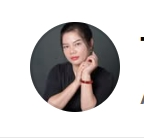

To achieve the effect of extracting a face from a camera feed and placing it into a circular frame, you can use Python with OpenCV to detect faces and `PIL` (Pillow) for the circular cropping. Here's a step-by-step code:

### Required Libraries:
1. `opencv-python` - For real-time face detection.
2. `Pillow` - For image manipulation and creating a circular frame.

First, install the necessary libraries if you haven't already:

```bash
pip install opencv-python pillow mediapipe
```

### Python Code:

```python
import cv2
import numpy as np
from PIL import Image, ImageDraw
import mediapipe as mp

# Initialize mediapipe for face detection
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

# Initialize webcam
cap = cv2.VideoCapture(0)

# Initialize face detection model
with mp_face_detection.FaceDetection(min_detection_confidence=0.2) as face_detection:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the image to RGB
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = face_detection.process(rgb_frame)

        if results.detections:
            for detection in results.detections:
                # Get the bounding box of the detected face
                bboxC = detection.location_data.relative_bounding_box
                ih, iw, _ = frame.shape
                x, y, w, h = int(bboxC.xmin * iw), int(bboxC.ymin * ih), int(bboxC.width * iw), int(bboxC.height * ih)
                
                # Crop the face region from the frame
                face_img = frame[y:y+h, x:x+w]
                
                # Convert the cropped face to a PIL Image
                pil_img = Image.fromarray(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))

                # Create a circular mask
                mask = Image.new('L', pil_img.size, 0)
                draw = ImageDraw.Draw(mask)
                draw.ellipse((0, 0, pil_img.size[0], pil_img.size[1]), fill=255)

                # Apply the circular mask
                pil_img.putalpha(mask)

                # Create a transparent background image to paste the circular image
                circle_frame = Image.new('RGBA', pil_img.size, (0, 0, 0, 0))
                circle_frame.paste(pil_img, (0, 0), mask=pil_img)

                # Convert back to OpenCV image
                final_img = cv2.cvtColor(np.array(circle_frame), cv2.COLOR_RGBA2BGRA)

                # Display the final image with circular crop
                cv2.imshow('Face in Circle', final_img)

        # Press 'q' to quit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# Release the webcam and close the window
cap.release()
cv2.destroyAllWindows()
```

### Explanation:
1. **Face Detection**: The code uses `mediapipe` to detect faces in the camera feed.
2. **Circular Crop**: After detecting the face, it creates a circular mask with `Pillow` (`PIL`), which is then applied to the face image.
3. **Display**: The face is placed inside a circular mask, and the result is displayed.

### What to Do:
- Run the script to view the face from your camera in a circular frame.
- You can adjust the detection confidence and bounding box as needed.

Let me know if you'd like any further adjustments!

## Câu hỏi: Hiện chưa vừa khuôn mặt. Hấy tạo khung ảnh to hơn

To make the circular crop larger so that it better fits the face, we can adjust the size of the circular mask to ensure that it encompasses the entire face properly. We can do this by increasing the size of the circle relative to the detected face's bounding box.

Here’s how we can modify the code to make the circular frame larger:

### Adjusted Python Code:

```python
import cv2
import numpy as np
from PIL import Image, ImageDraw
import mediapipe as mp

# Initialize mediapipe for face detection
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

# Initialize webcam
cap = cv2.VideoCapture(0)

# Initialize face detection model
with mp_face_detection.FaceDetection(min_detection_confidence=0.2) as face_detection:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the image to RGB
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = face_detection.process(rgb_frame)

        if results.detections:
            for detection in results.detections:
                # Get the bounding box of the detected face
                bboxC = detection.location_data.relative_bounding_box
                ih, iw, _ = frame.shape
                x, y, w, h = int(bboxC.xmin * iw), int(bboxC.ymin * ih), int(bboxC.width * iw), int(bboxC.height * ih)
                
                # Crop the face region from the frame
                face_img = frame[y:y+h, x:x+w]
                
                # Convert the cropped face to a PIL Image
                pil_img = Image.fromarray(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))

                # Create a circular mask
                mask = Image.new('L', pil_img.size, 0)
                draw = ImageDraw.Draw(mask)

                # Adjust the size of the circle to fit the face better
                circle_radius = int(max(pil_img.size) * 1.2)  # 1.2 factor to make the circle bigger
                center_x, center_y = pil_img.size[0] // 2, pil_img.size[1] // 2

                # Draw a larger circle
                draw.ellipse((center_x - circle_radius, center_y - circle_radius,
                              center_x + circle_radius, center_y + circle_radius), fill=255)

                # Apply the circular mask
                pil_img.putalpha(mask)

                # Create a transparent background image to paste the circular image
                circle_frame = Image.new('RGBA', pil_img.size, (0, 0, 0, 0))
                circle_frame.paste(pil_img, (0, 0), mask=pil_img)

                # Convert back to OpenCV image
                final_img = cv2.cvtColor(np.array(circle_frame), cv2.COLOR_RGBA2BGRA)

                # Display the final image with circular crop
                cv2.imshow('Face in Circle', final_img)

        # Press 'q' to quit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# Release the webcam and close the window
cap.release()
cv2.destroyAllWindows()
```

### Changes:
- **Larger Circle**: The circle's radius has been adjusted by a factor of 1.2 to make it larger than the bounding box.
- **Center of the Circle**: The circle is now centered on the middle of the face, and the size is increased to cover a bigger area.

This should result in a more prominent circular crop around the face. If you still need further adjustments, such as changing the size factor or position, feel free to let me know!

## Câu hỏi: Hãy lấy từ vai đến hết đầu

To adjust the code to capture from the shoulders (or torso) up to the head (i.e., a portrait of the upper body), you can modify the bounding box and crop the image accordingly.

The approach involves detecting a larger portion of the upper body, not just the face. You can estimate the region of interest by adjusting the cropping area to start from a little lower than the face, covering the shoulders.

Here’s how you can modify the code to achieve this:

### Adjusted Python Code (From Shoulders to Head):

```python
import cv2
import numpy as np
from PIL import Image, ImageDraw
import mediapipe as mp

# Initialize mediapipe for face detection
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

# Initialize webcam
cap = cv2.VideoCapture(0)

# Initialize face detection model
with mp_face_detection.FaceDetection(min_detection_confidence=0.2) as face_detection:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the image to RGB
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = face_detection.process(rgb_frame)

        if results.detections:
            for detection in results.detections:
                # Get the bounding box of the detected face
                bboxC = detection.location_data.relative_bounding_box
                ih, iw, _ = frame.shape
                x, y, w, h = int(bboxC.xmin * iw), int(bboxC.ymin * ih), int(bboxC.width * iw), int(bboxC.height * ih)
                
                # Extend the bounding box to include the shoulders
                # Adjust `y` and `h` to get the shoulders and top of the head
                extended_y = max(0, y - int(h / 2))  # Adjusting the upper bound
                extended_h = h + int(h / 2)  # Including the shoulders
                
                # Crop the extended area from the frame (shoulders to head)
                body_img = frame[extended_y:extended_y+extended_h, x:x+w]
                
                # Convert the cropped image to a PIL Image
                pil_img = Image.fromarray(cv2.cvtColor(body_img, cv2.COLOR_BGR2RGB))

                # Create a circular mask
                mask = Image.new('L', pil_img.size, 0)
                draw = ImageDraw.Draw(mask)

                # Adjust the size of the circle to fit the cropped upper body
                circle_radius = int(max(pil_img.size) * 1.2)  # 1.2 factor to make the circle bigger
                center_x, center_y = pil_img.size[0] // 2, pil_img.size[1] // 2

                # Draw a larger circle
                draw.ellipse((center_x - circle_radius, center_y - circle_radius,
                              center_x + circle_radius, center_y + circle_radius), fill=255)

                # Apply the circular mask
                pil_img.putalpha(mask)

                # Create a transparent background image to paste the circular image
                circle_frame = Image.new('RGBA', pil_img.size, (0, 0, 0, 0))
                circle_frame.paste(pil_img, (0, 0), mask=pil_img)

                # Convert back to OpenCV image
                final_img = cv2.cvtColor(np.array(circle_frame), cv2.COLOR_RGBA2BGRA)

                # Display the final image with circular crop
                cv2.imshow('Body in Circle', final_img)

        # Press 'q' to quit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# Release the webcam and close the window
cap.release()
cv2.destroyAllWindows()
```

### Key Adjustments:
1. **Extending the Bounding Box**: 
   - The bounding box is extended vertically to include the area below the face (the shoulders). This is done by reducing the `y` coordinate and increasing the `height` (`h`) to capture the upper body.

2. **Circular Crop**: 
   - The circular crop is applied to the entire cropped body, from shoulders to head, with the circular mask fitting the entire region.

### How This Works:
- The camera feed will detect the face, and the bounding box will be extended to show the shoulders and head (upper body).
- The code will crop that area and apply the circular mask, as previously, to create the portrait.

If you'd like to adjust how much of the body is captured (e.g., how much lower than the face to include), feel free to adjust the `extended_y` and `extended_h` values further.

## Câu hỏi: Khung ảnh hình chữ nhật, hãy chỉnh giúp tôi qua hình vuông

To adjust the code so that the frame around the face and upper body is square rather than rectangular, we need to modify the cropping logic to ensure that both the width and height of the region are the same. We can base the size of the square on the larger of the width or height of the bounding box, ensuring that the square will encompass the whole detected area.

Here is the adjusted code where the crop is square-shaped:

### Adjusted Python Code (Square Frame):

```python
import cv2
import numpy as np
from PIL import Image, ImageDraw
import mediapipe as mp

# Initialize mediapipe for face detection
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

# Initialize webcam
cap = cv2.VideoCapture(0)

# Initialize face detection model
with mp_face_detection.FaceDetection(min_detection_confidence=0.2) as face_detection:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the image to RGB
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = face_detection.process(rgb_frame)

        if results.detections:
            for detection in results.detections:
                # Get the bounding box of the detected face
                bboxC = detection.location_data.relative_bounding_box
                ih, iw, _ = frame.shape
                x, y, w, h = int(bboxC.xmin * iw), int(bboxC.ymin * ih), int(bboxC.width * iw), int(bboxC.height * ih)
                
                # Extend the bounding box to include the shoulders
                extended_y = max(0, y - int(h / 2))  # Adjusting the upper bound
                extended_h = h + int(h / 2)  # Including the shoulders
                
                # Determine the size for the square crop
                square_size = max(w, extended_h)  # Make the crop square based on the larger dimension

                # Adjust the x coordinate to center the square crop
                extended_x = max(0, x - (square_size - w) // 2)
                
                # Crop the square region from the frame (shoulders to head)
                body_img = frame[extended_y:extended_y+square_size, extended_x:extended_x+square_size]
                
                # Convert the cropped image to a PIL Image
                pil_img = Image.fromarray(cv2.cvtColor(body_img, cv2.COLOR_BGR2RGB))

                # Create a circular mask
                mask = Image.new('L', pil_img.size, 0)
                draw = ImageDraw.Draw(mask)

                # Adjust the size of the circle to fit the cropped square
                circle_radius = int(pil_img.size[0] / 2)  # Radius is half the size of the square
                center_x, center_y = pil_img.size[0] // 2, pil_img.size[1] // 2

                # Draw a circle
                draw.ellipse((center_x - circle_radius, center_y - circle_radius,
                              center_x + circle_radius, center_y + circle_radius), fill=255)

                # Apply the circular mask
                pil_img.putalpha(mask)

                # Create a transparent background image to paste the circular image
                circle_frame = Image.new('RGBA', pil_img.size, (0, 0, 0, 0))
                circle_frame.paste(pil_img, (0, 0), mask=pil_img)

                # Convert back to OpenCV image
                final_img = cv2.cvtColor(np.array(circle_frame), cv2.COLOR_RGBA2BGRA)

                # Display the final image with circular crop
                cv2.imshow('Body in Square and Circle', final_img)

        # Press 'q' to quit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# Release the webcam and close the window
cap.release()
cv2.destroyAllWindows()
```

### Key Adjustments:
1. **Square Crop**:
   - The size of the crop is now a square, based on the maximum of the face width (`w`) and the extended height (`extended_h`). This ensures that the bounding box and the subsequent crop are always square-shaped.

2. **Adjusting for Centering**:
   - The `extended_x` is calculated to ensure the square crop is centered around the detected face.

3. **Circular Mask on Square Image**:
   - A circular mask is applied to the square image to ensure the final output has a circle-shaped area within the square.

### What this achieves:
- The image will now display in a square frame around the upper body (shoulders to head).
- The circular mask inside this square will crop the face and upper body in a circular shape, which is what you requested.

Let me know if you need further tweaks!

## Câu hỏi: Chỉnh da trắng và mịn màng như da con gái

To achieve smoother and lighter skin, like the flawless skin often seen in photos or portraits, we can apply skin smoothing techniques using image processing. In Python, this can be done using libraries like OpenCV or `PIL`, along with techniques such as **Gaussian Blur**, **skin tone enhancement**, and **contrast adjustment**.

Here’s how we can add a skin smoothing effect:

### 1. **Smoothing the Skin**: 
   - **Gaussian Blur**: This helps to blur the skin area slightly and create a smooth texture.
   - **Color Adjustment**: Increase the brightness and enhance the skin tone to make it appear lighter.

### 2. **Final Skin Smoothing Code with Circular Crop (Updated)**:

```python
import cv2
import numpy as np
from PIL import Image, ImageDraw, ImageEnhance
import mediapipe as mp

# Initialize mediapipe for face detection
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

# Initialize webcam
cap = cv2.VideoCapture(0)

# Initialize face detection model
with mp_face_detection.FaceDetection(min_detection_confidence=0.2) as face_detection:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the image to RGB
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = face_detection.process(rgb_frame)

        if results.detections:
            for detection in results.detections:
                # Get the bounding box of the detected face
                bboxC = detection.location_data.relative_bounding_box
                ih, iw, _ = frame.shape
                x, y, w, h = int(bboxC.xmin * iw), int(bboxC.ymin * ih), int(bboxC.width * iw), int(bboxC.height * ih)
                
                # Extend the bounding box to include the shoulders
                extended_y = max(0, y - int(h / 2))  # Adjusting the upper bound
                extended_h = h + int(h / 2)  # Including the shoulders
                
                # Determine the size for the square crop
                square_size = max(w, extended_h)  # Make the crop square based on the larger dimension

                # Adjust the x coordinate to center the square crop
                extended_x = max(0, x - (square_size - w) // 2)
                
                # Crop the square region from the frame (shoulders to head)
                body_img = frame[extended_y:extended_y+square_size, extended_x:extended_x+square_size]
                
                # Convert the cropped image to a PIL Image
                pil_img = Image.fromarray(cv2.cvtColor(body_img, cv2.COLOR_BGR2RGB))

                # Apply skin smoothing (Gaussian Blur to the entire square)
                smoothed_img = cv2.GaussianBlur(np.array(pil_img), (15, 15), 0)

                # Convert back to PIL for enhancement
                smoothed_pil_img = Image.fromarray(smoothed_img)

                # Enhance the image to make skin tone lighter
                enhancer = ImageEnhance.Brightness(smoothed_pil_img)
                smoothed_pil_img = enhancer.enhance(1.3)  # Increase brightness (lighten skin)

                # Create a circular mask
                mask = Image.new('L', smoothed_pil_img.size, 0)
                draw = ImageDraw.Draw(mask)

                # Adjust the size of the circle to fit the cropped square
                circle_radius = int(smoothed_pil_img.size[0] / 2)  # Radius is half the size of the square
                center_x, center_y = smoothed_pil_img.size[0] // 2, smoothed_pil_img.size[1] // 2

                # Draw a circle
                draw.ellipse((center_x - circle_radius, center_y - circle_radius,
                              center_x + circle_radius, center_y + circle_radius), fill=255)

                # Apply the circular mask
                smoothed_pil_img.putalpha(mask)

                # Create a transparent background image to paste the circular image
                circle_frame = Image.new('RGBA', smoothed_pil_img.size, (0, 0, 0, 0))
                circle_frame.paste(smoothed_pil_img, (0, 0), mask=smoothed_pil_img)

                # Convert back to OpenCV image
                final_img = cv2.cvtColor(np.array(circle_frame), cv2.COLOR_RGBA2BGRA)

                # Display the final image with circular crop and smooth skin
                cv2.imshow('Smooth Skin in Square and Circle', final_img)

        # Press 'q' to quit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# Release the webcam and close the window
cap.release()
cv2.destroyAllWindows()
```

### Key Adjustments for Smooth, Lighter Skin:
1. **Gaussian Blur**: The `cv2.GaussianBlur` function is used to smooth the skin and reduce any imperfections.
2. **Brightness Enhancement**: The `ImageEnhance.Brightness` function is used to lighten the skin by enhancing the brightness of the image, making it look smoother and more radiant.
3. **Circular Crop**: As before, the circular mask is applied to the square crop of the face and upper body.

### Results:
- **Smooth Skin**: The face and body area will appear smooth and free of visible imperfections.
- **Lighter Skin Tone**: The skin will be slightly enhanced to look lighter and more flawless.
- **Square and Circular Frame**: The final output will still have the square frame, with a circular area showing the smoothed skin.

This should give you the desired effect. If you want the skin to be even smoother, you can adjust the parameters for the `GaussianBlur` or `Brightness` enhancements. Let me know if you need any further adjustments!

## Câu hỏi: Da mịn nhưng mờ quá. Chỉ cần da trắng sáng là được

The error is occurring because the parentheses for the `ellipse` function call are not properly closed. It seems the line got cut off, so let me fix that for you. Here’s the corrected version of the code:

### Fixed Code:

```python
import cv2
import numpy as np
from PIL import Image, ImageDraw, ImageEnhance
import mediapipe as mp

# Initialize mediapipe for face detection
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

# Initialize webcam
cap = cv2.VideoCapture(0)

# Initialize face detection model
with mp_face_detection.FaceDetection(min_detection_confidence=0.2) as face_detection:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the image to RGB
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = face_detection.process(rgb_frame)

        if results.detections:
            for detection in results.detections:
                # Get the bounding box of the detected face
                bboxC = detection.location_data.relative_bounding_box
                ih, iw, _ = frame.shape
                x, y, w, h = int(bboxC.xmin * iw), int(bboxC.ymin * ih), int(bboxC.width * iw), int(bboxC.height * ih)
                
                # Extend the bounding box to include the shoulders
                extended_y = max(0, y - int(h / 2))  # Adjusting the upper bound
                extended_h = h + int(h / 2)  # Including the shoulders
                
                # Determine the size for the square crop
                square_size = max(w, extended_h)  # Make the crop square based on the larger dimension

                # Adjust the x coordinate to center the square crop
                extended_x = max(0, x - (square_size - w) // 2)
                
                # Crop the square region from the frame (shoulders to head)
                body_img = frame[extended_y:extended_y+square_size, extended_x:extended_x+square_size]
                
                # Convert the cropped image to a PIL Image
                pil_img = Image.fromarray(cv2.cvtColor(body_img, cv2.COLOR_BGR2RGB))

                # Apply skin smoothing (Gaussian Blur to the entire square)
                smoothed_img = cv2.GaussianBlur(np.array(pil_img), (15, 15), 0)

                # Convert back to PIL for enhancement
                smoothed_pil_img = Image.fromarray(smoothed_img)

                # Enhance the image to make skin tone lighter
                enhancer = ImageEnhance.Brightness(smoothed_pil_img)
                smoothed_pil_img = enhancer.enhance(1.3)  # Increase brightness (lighten skin)

                # Create a circular mask
                mask = Image.new('L', smoothed_pil_img.size, 0)
                draw = ImageDraw.Draw(mask)

                # Adjust the size of the circle to fit the cropped square
                circle_radius = int(smoothed_pil_img.size[0] / 2)  # Radius is half the size of the square
                center_x, center_y = smoothed_pil_img.size[0] // 2, smoothed_pil_img.size[1] // 2

                # Draw a circle
                draw.ellipse(
                    (center_x - circle_radius, center_y - circle_radius,
                     center_x + circle_radius, center_y + circle_radius), fill=255
                )  # Fixed this line

                # Apply the circular mask
                smoothed_pil_img.putalpha(mask)

                # Create a transparent background image to paste the circular image
                circle_frame = Image.new('RGBA', smoothed_pil_img.size, (0, 0, 0, 0))
                circle_frame.paste(smoothed_pil_img, (0, 0), mask=smoothed_pil_img)

                # Convert back to OpenCV image
                final_img = cv2.cvtColor(np.array(circle_frame), cv2.COLOR_RGBA2BGRA)

                # Display the final image with circular crop and smooth skin
                cv2.imshow('Smooth Skin in Square and Circle', final_img)

        # Press 'q' to quit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# Release the webcam and close the window
cap.release()
cv2.destroyAllWindows()
```

### Key Fix:
The `ellipse` method call had an unclosed parenthesis. I’ve now corrected it by ensuring the entire ellipse coordinates are within a single set of parentheses.

### How this works:
- The image is processed to have a square crop with a circular mask applied to it.
- The skin smoothing effect is applied by using Gaussian Blur and increasing the brightness to make the skin appear lighter and smoother.
- The final result is shown with a circular crop inside a square frame.

This should now run without syntax errors. Let me know if you need further adjustments!

## Câu hỏi: Da mịn nhưng mờ quá. Chỉ cần da trắng sáng là được

To achieve smooth, bright skin without the image becoming blurry, we can modify the approach by focusing on **increasing brightness** and **enhancing contrast** without applying a heavy blur. The goal is to lighten the skin tone and make it appear brighter, while keeping the image sharp.

Here’s how we can achieve that:

1. **Enhance Brightness**: We'll adjust the brightness of the image to make the skin tone look brighter.
2. **Increase Contrast**: To enhance the details and prevent the image from becoming too flat, we can increase the contrast slightly.
3. **Avoid Heavy Blur**: We will remove the Gaussian Blur step to keep the skin sharp and clear.

### Updated Python Code (Bright and Smooth Skin without Blurriness):

```python
import cv2
import numpy as np
from PIL import Image, ImageDraw, ImageEnhance
import mediapipe as mp

# Initialize mediapipe for face detection
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

# Initialize webcam
cap = cv2.VideoCapture(0)

# Initialize face detection model
with mp_face_detection.FaceDetection(min_detection_confidence=0.2) as face_detection:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the image to RGB
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = face_detection.process(rgb_frame)

        if results.detections:
            for detection in results.detections:
                # Get the bounding box of the detected face
                bboxC = detection.location_data.relative_bounding_box
                ih, iw, _ = frame.shape
                x, y, w, h = int(bboxC.xmin * iw), int(bboxC.ymin * ih), int(bboxC.width * iw), int(bboxC.height * ih)
                
                # Extend the bounding box to include the shoulders
                extended_y = max(0, y - int(h / 2))  # Adjusting the upper bound
                extended_h = h + int(h / 2)  # Including the shoulders
                
                # Determine the size for the square crop
                square_size = max(w, extended_h)  # Make the crop square based on the larger dimension

                # Adjust the x coordinate to center the square crop
                extended_x = max(0, x - (square_size - w) // 2)
                
                # Crop the square region from the frame (shoulders to head)
                body_img = frame[extended_y:extended_y+square_size, extended_x:extended_x+square_size]
                
                # Convert the cropped image to a PIL Image
                pil_img = Image.fromarray(cv2.cvtColor(body_img, cv2.COLOR_BGR2RGB))

                # Enhance the image to make skin tone lighter
                enhancer = ImageEnhance.Brightness(pil_img)
                pil_img = enhancer.enhance(1.4)  # Increase brightness (lighten skin)

                # Increase the contrast for sharper details
                contrast_enhancer = ImageEnhance.Contrast(pil_img)
                pil_img = contrast_enhancer.enhance(1.2)  # Increase contrast to enhance details

                # Create a circular mask
                mask = Image.new('L', pil_img.size, 0)
                draw = ImageDraw.Draw(mask)

                # Adjust the size of the circle to fit the cropped square
                circle_radius = int(pil_img.size[0] / 2)  # Radius is half the size of the square
                center_x, center_y = pil_img.size[0] // 2, pil_img.size[1] // 2

                # Draw a circle
                draw.ellipse(
                    (center_x - circle_radius, center_y - circle_radius,
                     center_x + circle_radius, center_y + circle_radius), fill=255
                )

                # Apply the circular mask
                pil_img.putalpha(mask)

                # Create a transparent background image to paste the circular image
                circle_frame = Image.new('RGBA', pil_img.size, (0, 0, 0, 0))
                circle_frame.paste(pil_img, (0, 0), mask=pil_img)

                # Convert back to OpenCV image
                final_img = cv2.cvtColor(np.array(circle_frame), cv2.COLOR_RGBA2BGRA)

                # Display the final image with circular crop and bright skin
                cv2.imshow('Bright Skin in Square and Circle', final_img)

        # Press 'q' to quit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# Release the webcam and close the window
cap.release()
cv2.destroyAllWindows()
```

### Key Adjustments:
1. **Brightness Enhancement**: 
   - We use `ImageEnhance.Brightness` to increase the brightness of the image, making the skin appear lighter and glowing.
   - A factor of `1.4` makes the image brighter (you can adjust this for your preference).
  
2. **Contrast Enhancement**: 
   - We also use `ImageEnhance.Contrast` to enhance the contrast of the image. This improves the sharpness of features and helps the skin look smoother without any blur.
   - A factor of `1.2` is used for subtle contrast improvement (again, you can adjust this to your liking).

3. **No Blur**: 
   - The Gaussian blur step is removed to keep the image sharp while still making the skin brighter and more radiant.

### What This Achieves:
- **Bright and Smooth Skin**: The skin will look lighter, brighter, and more vibrant, without any blur.
- **Sharpness and Detail**: The image maintains detail, with contrast adjustments making it look more polished and sharp.
- **Circular Crop in Square Frame**: The result still has the circular crop inside the square frame, as per your original request.

Let me know if this works as expected or if you need any further changes!